In [1]:
from requests import get
from json import loads
import numpy as np
from pandas import DataFrame,read_csv
from matplotlib import pyplot as plt
import tensorflow as tf

In [47]:
i = tf.keras.layers.Input((1,))
out = tf.keras.layers.Dense(100,activation='relu')(i)
out = tf.keras.layers.Dense(100,activation='relu')(out)
# out = tf.keras.layers.Dense(32)(out)
out = tf.keras.layers.Dense(1)(out)
model = tf.keras.Model(inputs=i,outputs=out)


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
   1e-2,625, 0.9, name=None
)
adam = tf.keras.optimizers.Adam(
    learning_rate=lr_schedule,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-7,
    amsgrad=False,
    name='Adam'
)



model.compile(optimizer=adam, loss="mean_absolute_error", metrics=["mae"])
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_46 (Dense)            (None, 100)               200       
                                                                 
 dense_47 (Dense)            (None, 100)               10100     
                                                                 
 dense_48 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [40]:
x = np.linspace(-np.pi,np.pi,10000)
y = np.sin(x)
x = tf.convert_to_tensor(x)
x = tf.reshape(x,(10000,1))
y = tf.reshape(y,(10000,1))

In [48]:
p_ = model(x)
model.fit(x=x,y=y,epochs=32,batch_size=32)

Epoch 1/32
313/313 [==============================] - 1s 3ms/step - loss: 0.0974 - mae: 0.0974
Epoch 2/32
313/313 [==============================] - 1s 3ms/step - loss: 0.0300 - mae: 0.0300
Epoch 3/32
313/313 [==============================] - 1s 3ms/step - loss: 0.0268 - mae: 0.0268
Epoch 4/32
313/313 [==============================] - 1s 4ms/step - loss: 0.0241 - mae: 0.0241
Epoch 5/32
313/313 [==============================] - 1s 5ms/step - loss: 0.0185 - mae: 0.0185
Epoch 6/32
313/313 [==============================] - 1s 5ms/step - loss: 0.0221 - mae: 0.0221
Epoch 7/32
313/313 [==============================] - 1s 5ms/step - loss: 0.0172 - mae: 0.0172
Epoch 8/32
313/313 [==============================] - 2s 5ms/step - loss: 0.0150 - mae: 0.0150
Epoch 9/32
313/313 [==============================] - 2s 5ms/step - loss: 0.0131 - mae: 0.0131
Epoch 10/32
313/313 [==============================] - 2s 5ms/step - loss: 0.0145 - mae: 0.0145
Epoch 11/32
313/313 [============================

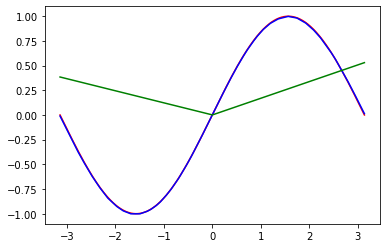

In [49]:
p = model(x)
p = p.numpy().flatten()
plt.plot(x,y,color='r')
plt.plot(x,p,color='b')
plt.plot(x,p_,color='g')
plt.show()